In [1]:
!pip install pandas matplotlib seaborn

In [2]:
# Step 1: Upload your CSV file
from google.colab import files
uploaded = files.upload()

Saving Rainfall In India.csv to Rainfall In India.csv


In [3]:
import pandas as pd

In [20]:
# Step 2: Load the uploaded CSV file into a pandas DataFrame
import pandas as pd

# Get the file name of the uploaded CSV
file_name = list(uploaded.keys())[0]

# Load the CSV file into a pandas DataFrame
data = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
print("Data Preview:")
print(data.head())


Data Preview:
            State/UT  Jan (%)  Feb (%)  Mar (%)  Apr (%)  May (%)  Jun (%)  \
0     Andhra Pradesh      1.5      1.8      2.0      2.5      5.5       17   
1  Arunachal Pradesh      3.0      3.5      4.5      6.0      8.0       20   
2              Assam      2.5      2.8      4.0      5.0     10.0       25   
3              Bihar      0.5      1.0      2.0      2.5      8.0       30   
4       Chhattisgarh      0.5      1.0      1.5      2.0      5.0       30   

   Jul (%)  Aug (%)  Sep (%)  Oct (%)  Nov (%)  Dec (%)  Total Rainfall (mm)  \
0       25       22       12      7.5      3.0      0.8                  890   
1       25       15        8      5.0      1.5      0.5                 2500   
2       25       15        5      4.0      1.0      0.7                 2000   
3       30       15        8      2.0      1.0      0.5                 1200   
4       35       15        7      2.0      0.8      0.2                 1400   

  Classification  
0       Moderate 

In [27]:
# Step 3: Data Cleaning - Check for missing values
print("\nChecking for missing values...")
print(data.isnull().sum())

# Step 4: Fill missing values with 0 (or you can drop rows if needed)
data.fillna(0, inplace=True)

# Optionally, convert columns to numeric (if necessary)
# Exclude 'Rainfall Classification' from the columns to be converted
monthly_columns = data.columns[1:-1]  # Assuming the first column is 'State' and remaining are months excluding 'Rainfall Classification'
data[monthly_columns] = data[monthly_columns].apply(pd.to_numeric, errors='coerce') # Apply pd.to_numeric only to the selected columns


Checking for missing values...
State/UT               0
Jan (%)                0
Feb (%)                0
Mar (%)                0
Apr (%)                0
May (%)                0
Jun (%)                0
Jul (%)                0
Aug (%)                0
Sep (%)                0
Oct (%)                0
Nov (%)                0
Dec (%)                0
Total Rainfall (mm)    0
Classification         0
dtype: int64


In [31]:
# Step 5: Calculate total annual rainfall and classify the states
monthly_columns = data.columns[1:-1]

# Convert all columns in monthly_columns to numeric before summing
for col in monthly_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data['Total Rainfall (mm)'] = data[monthly_columns].sum(axis=1)

# Classify rainfall based on the total annual rainfall value
def classify_rainfall(value):
    if value > 2500:
        return 'Extremely Heavy'
    elif value > 2000:
        return 'Very Heavy'
    elif value > 1000:
        return 'Heavy'
    elif value > 500:
        return 'Moderate'
    else:
        return 'Low'

data['Total Rainfall (mm)'] = data['Total Rainfall (mm)'].apply(classify_rainfall)

In [39]:
# Check the data types of the columns
print(data['Total Rainfall (mm)'].dtype)

# Display the range of values in the 'Total Rainfall (mm)' column
print(data['Total Rainfall (mm)'].describe())


object
count      35
unique      1
top       Low
freq       35
Name: Total Rainfall (mm), dtype: object


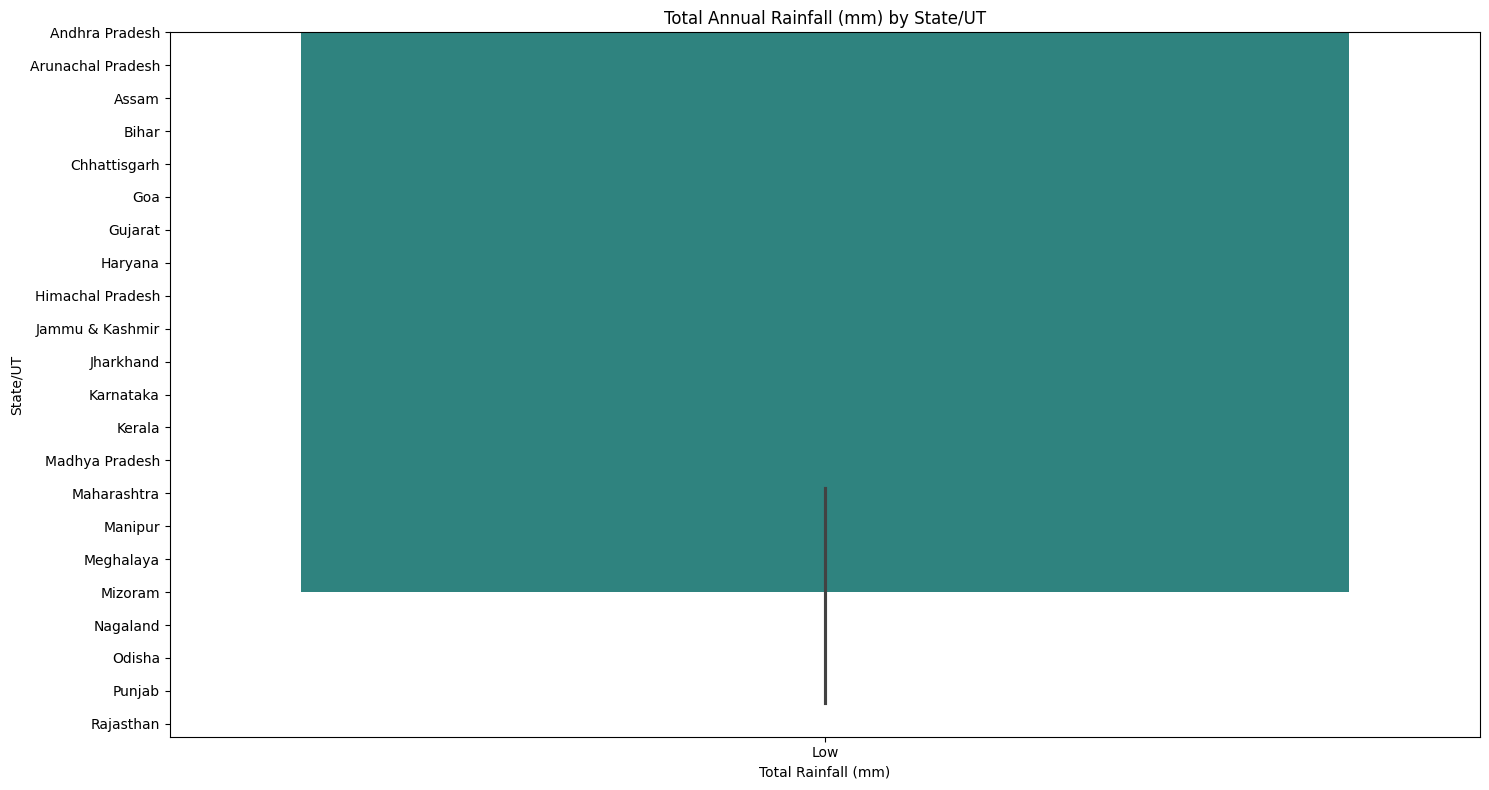

In [42]:
# Step 6: Visualization - Barplot of total annual rainfall (mm) by state
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

# Explicitly assign 'Total Rainfall (mm)' to the 'hue' parameter and set legend=False
sns.barplot(x='Total Rainfall (mm)', y='State/UT', data=data, palette='viridis', hue='Total Rainfall (mm)', legend=False)

plt.title('Total Annual Rainfall (mm) by State/UT')
plt.xlabel('Total Rainfall (mm)')
plt.ylabel('State/UT')
plt.tight_layout()
plt.show()


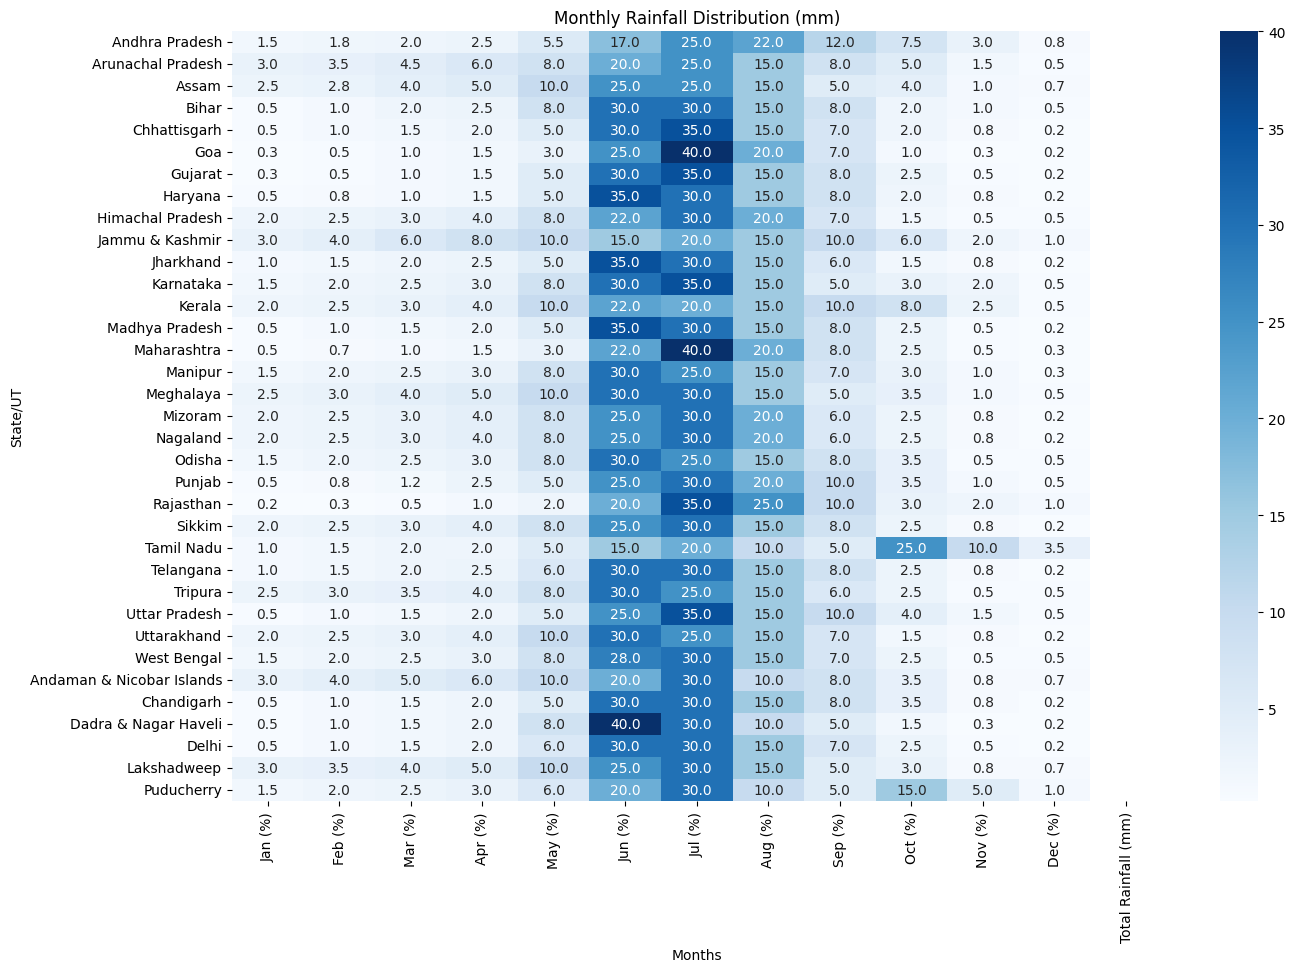

In [46]:
# Step 7: Visualization - Heatmap of monthly rainfall distribution (mm)
plt.figure(figsize=(15, 10))

# Exclude 'Total Rainfall (mm)' from the columns used for heatmap
heatmap_columns = data.columns[1:-1] # Select columns from 'JAN' to 'DEC'

# Convert columns to numeric before creating the heatmap
numeric_data = data[heatmap_columns].apply(pd.to_numeric, errors='coerce')

# Use the selected and converted columns for the heatmap
# set_index() is called on numeric_data to avoid the error
sns.heatmap(numeric_data.set_index(data['State/UT']), cmap='Blues', annot=True, fmt=".1f")

plt.title('Monthly Rainfall Distribution (mm)')
plt.ylabel('State/UT')
plt.xlabel('Months')
plt.show()

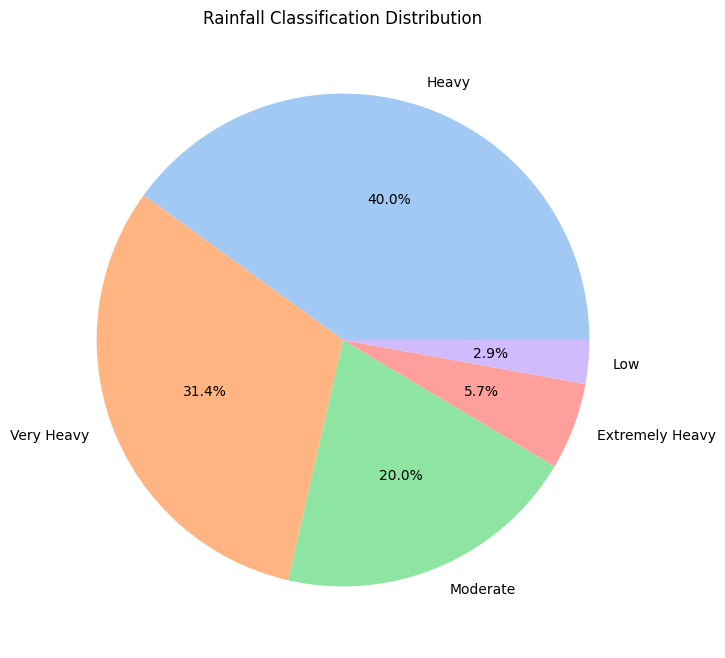

In [47]:
# Step 8: Visualization - Pie chart for rainfall classification distribution
classification_summary = data['Classification'].value_counts()
classification_summary.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=sns.color_palette('pastel'))
plt.title('Rainfall Classification Distribution')
plt.ylabel('')
plt.show()


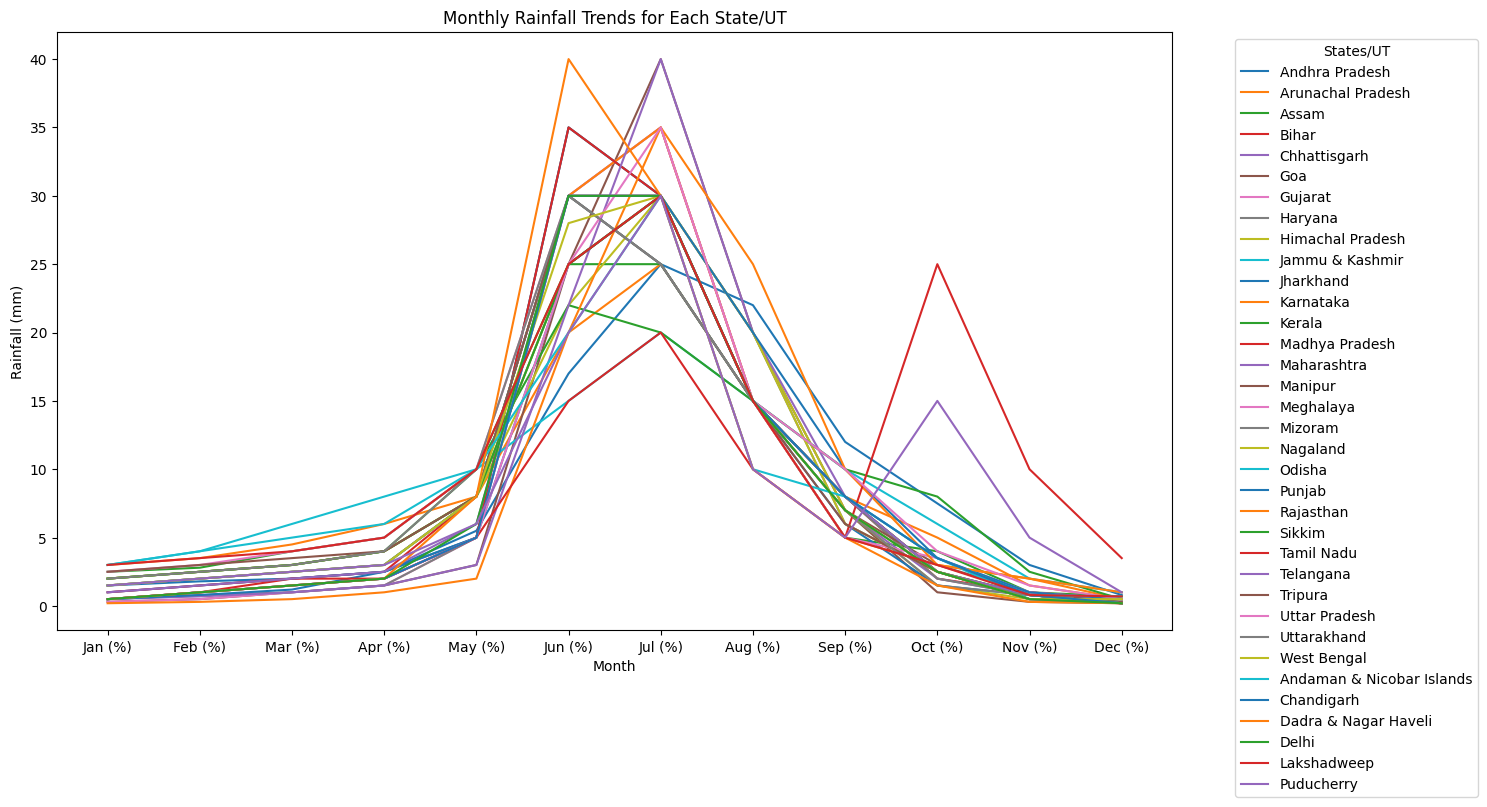

In [49]:
# Line plot of monthly rainfall trends for each state
plt.figure(figsize=(15, 8))

# Reset 'Total Rainfall (mm)' column to numerical values for plotting
monthly_columns = data.columns[1:-2]  # Exclude 'Classification' and 'Total Rainfall (mm)'
data['Total Rainfall (mm)'] = data[monthly_columns].sum(axis=1)

# Plot all states in a line plot for monthly rainfall
for state in data['State/UT']:
    plt.plot(data.columns[1:-2], data.loc[data['State/UT'] == state, data.columns[1:-2]].values.flatten(), label=state)

plt.title('Monthly Rainfall Trends for Each State/UT')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')  # Changed y-axis label to reflect numerical values
plt.legend(title='States/UT', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

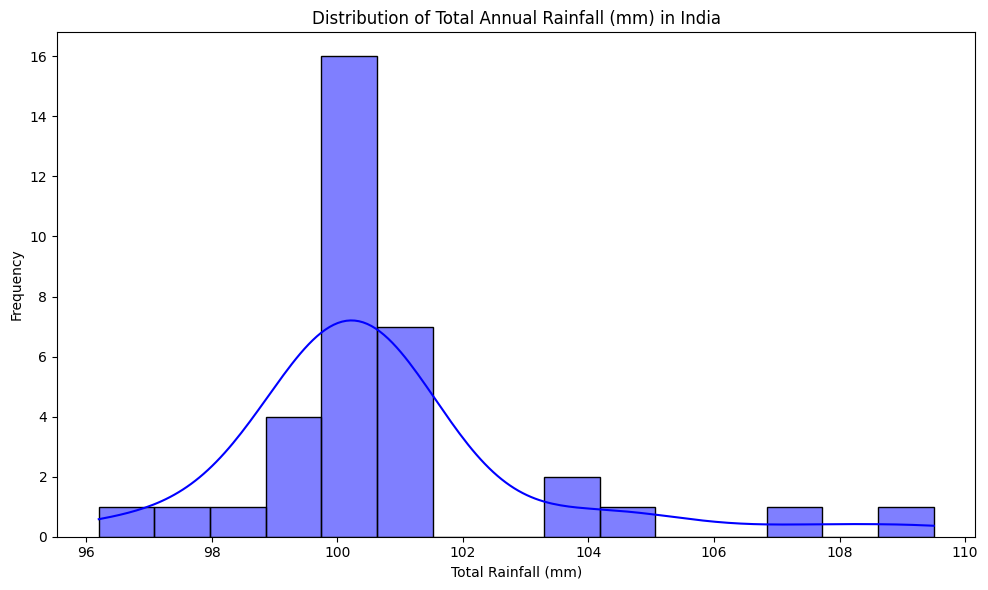

In [53]:
# Histogram of Total Rainfall (mm)
plt.figure(figsize=(10, 6))

sns.histplot(data['Total Rainfall (mm)'], bins=15, kde=True, color='blue')

plt.title('Distribution of Total Annual Rainfall (mm) in India')
plt.xlabel('Total Rainfall (mm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


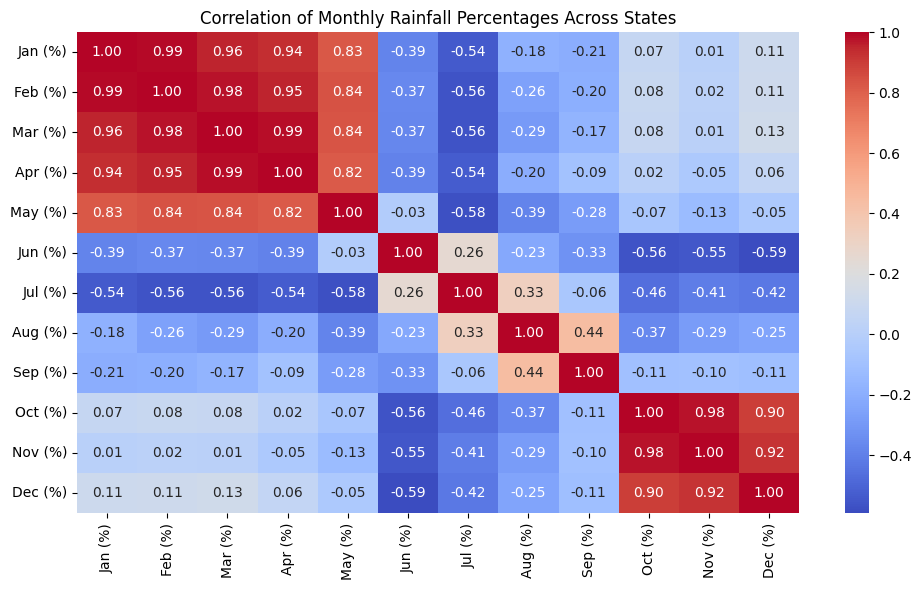

In [56]:
# Correlation heatmap of monthly rainfall percentages
# 'State/UT' is removed from the columns to be dropped since it will be used for the index
monthly_rainfall = data.drop(columns=['Total Rainfall (mm)', 'Classification']).set_index('State/UT')

# Calculate correlation matrix
corr = monthly_rainfall.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title('Correlation of Monthly Rainfall Percentages Across States')
plt.tight_layout()
plt.show()